In [ ]:
# Acquisition and collection of the data.
#import libraries to use.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#load the data.
dset = pd.read_csv("CSUSHPISA.csv")
print(dset)

           DATE  CSUSHPISA
0    1987-01-01     63.965
1    1987-02-01     64.424
2    1987-03-01     64.736
3    1987-04-01     65.131
4    1987-05-01     65.564
..          ...        ...
439  2023-08-01    309.236
440  2023-09-01    311.195
441  2023-10-01    312.882
442  2023-11-01    313.648
443  2023-12-01    314.259

[444 rows x 2 columns]


- So after importing and reading the csv file data. I went ahead  to look at the total entries of the dafraem as follows

In [ ]:
# Total entries of the data
total_entries = len(dset)
print(len(dset))

444


- Also, i checked if the data has any missing values,

In [ ]:
# processing the data.
# cleaning the data by handling missing values and outliers.
#checking for missing values

missing_values = dset.isnull().sum()
print(missing_values)

DATE         0
CSUSHPISA    0
dtype: int64


- From the data it is clear that the data has no missing values

Next i checked the info of the data just to look at the dataframe info

In [ ]:
dset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DATE       444 non-null    object 
 1   CSUSHPISA  444 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.1+ KB


- From the dataframe it is clear that we have 444 entries and 2 columns(DATE and CSUSHPISA). All of them have non null count , meaning we do not have nay null values. Alo, we can see that DATE is an object dtype while CSUSHPISA is float

# Next i cehcked at decsribe to look at teh statistical Summary of the data

In [ ]:
dset.describe()

,CSUSHPISA
count,444.000000
mean,143.068007
std,62.584143
min,63.965000
25%,82.364250
50%,141.582500
75%,179.487250
max,314.259000


- So we can see it picked the numeriacl column and it has give us the count which are the entries in our dataframe. The median is 143.06, standard deviation is 62.584, min is 63.965, lowe quartile(255) is 82.363, 50% percent quartile is 141.58 which is same as median, and max is 314.25


-***So as we looking at the name of the column, it does not look good, somebody reading my data cannot a get a full understanding of what it means, so ui went ahead to rename the column as follows***

In [ ]:
# Rename the 'CSUSHPISA' column to 'Housevalue_trends'
dset.rename(columns={'CSUSHPISA': 'Housevalue_trends'}, inplace=True)


In [ ]:
dset.head()

,DATE,Housevalue_trends
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.131
4,1987-05-01,65.564


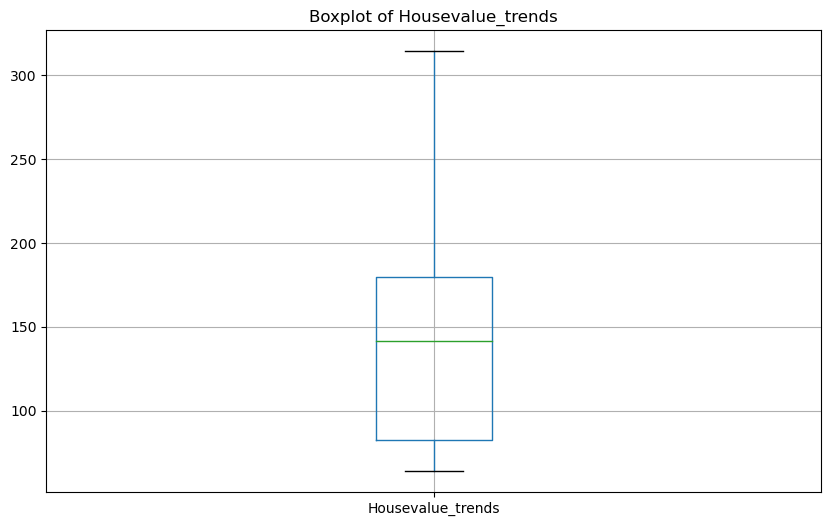

In [ ]:
# checking for outliers by boxplot
plt.figure(figsize=(10, 6))
dset.boxplot(column=['Housevalue_trends'])
plt.title('Boxplot of Housevalue_trends')
plt.show()

- Next is carrying out feature collection, since from date Column we can cary out feature extraction to get months , year and day, that is what i went ahead to do

In [ ]:
#model building
#importing libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
# Step 2: Feature Engineering
# Convert the 'DATE' column to datetime format
dset['DATE'] = pd.to_datetime(dset['DATE'])

# Extract year, month, and day
dset['year'] = dset['DATE'].dt.year
dset['month'] = dset['DATE'].dt.month
dset['day'] = dset['DATE'].dt.day


In [ ]:
dset.head()

,DATE,Housevalue_trends,year,month,day
0,1987-01-01,63.965,1987,1,1
1,1987-02-01,64.424,1987,2,1
2,1987-03-01,64.736,1987,3,1
3,1987-04-01,65.131,1987,4,1
4,1987-05-01,65.564,1987,5,1


In [ ]:
# Set the 'DATE' column as the index
dset.set_index('DATE', inplace=True)


In [ ]:
dset.head()

,Housevalue_trends,year,month,day
DATE,,,,
1987-01-01,63.965,1987,1,1
1987-02-01,64.424,1987,2,1
1987-03-01,64.736,1987,3,1
1987-04-01,65.131,1987,4,1
1987-05-01,65.564,1987,5,1


In [ ]:
#Data splitting and scaling
X = dset[['year']]  # Features
y = dset['Housevalue_trends']         # Target variable

In [ ]:
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [ ]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(X_train.shape)

(355, 1)


In [ ]:
# Print the shapes of training and testing sets
print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("\nTesting set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


Training set shapes:
X_train: (355, 1)
y_train: (355,)

Testing set shapes:
X_test: (89, 1)
y_test: (89,)


- I wanted to use Linear REgression model for buiding my model hence i fitted it

In [ ]:
#model training
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
#doing the predictions

y_prediction = lin_reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_prediction)
print("Mean Squared Error:", mse)

Mean Squared Error: 641.7692266994028


- A Mean Squared Error (MSE) of 641.7692266994028 indicates the average squared difference between the actual and predicted home price values



- I went ahead to calculate the accuracy score

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test is your actual target values and y_prediction is the predicted values
r2_score_value = r2_score(y_test, y_prediction)
print(r2_score_value)

0.8436413794132215


- the R2 score is approximately 0.8436413794132215, which indicates that around 84.36% of the variance in the target variable is explained by the independent variables in your predictive model.

- A higher R2 score closer to 1 indicates that the model fits the data well, while a lower score suggests that the model does not explain much of the variability in the target variable.

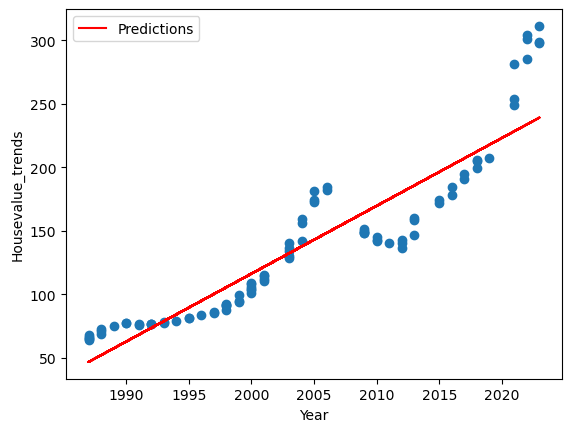

In [ ]:
import matplotlib.pyplot as plt
# Assuming X_test is the subset of X used for predictions
y_prediction = lin_reg.predict(X_test)

# Ensure X_test is used for plotting
plt.figure()
plt.scatter(X_test, y_test) # Assuming y_test is the actual values for X_test
plt.plot(X_test, y_prediction, color="red", label='Predictions')
plt.xlabel("Year")
plt.ylabel("Housevalue_trends")
plt.legend()
plt.show()




- From the scatter plot we can see that majority of the actual values are far from predicted hence not avgood mofel fit fro out model

# Now i went ahead to test it with Random forest Regression model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# PREPOCESSING

In [ ]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- fitting the model

In [ ]:
#model training
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

In [ ]:
#doing the predictions
# Get predictions
y_pred = RF.predict(X_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 5.256437663049427


In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test is your actual target values and y_prediction is the predicted values
r2_score_value = r2_score(y_test, y_pred)
print(r2_score_value)

0.9951957256307693


- The R2 score for Random Forest Regression is significantly higher (approximately 0.0.9951957256307693) compared to Linear Regression (approximately 0.8436). This indicates that the Random Forest Regression model performs exceptionally well in explaining the variance in the target variable based on the independent variables.

- A high R2 score close to 1 suggests that the Random Forest model is almost perfectly able to predict the target variable based on the features provided. In contrast, while the R2 score for Linear Regression is also relatively high, it is lower compared to Random Forest, indicating that Linear Regression explains less of the variance in the target variable compared to Random Forest.

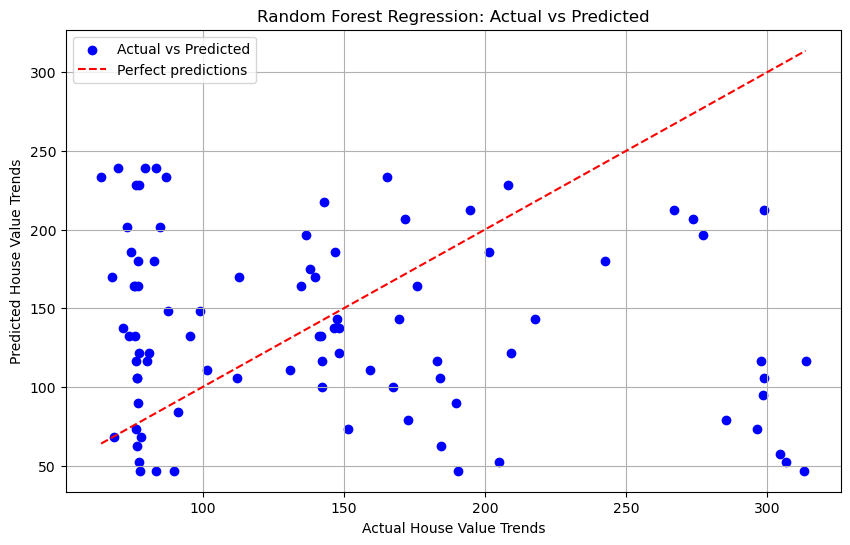

In [ ]:
import matplotlib.pyplot as plt

# Plotting the scatter plot for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_prediction, color='blue', label='Actual vs Predicted')

# Adding a line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect predictions')

plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual House Value Trends')
plt.ylabel('Predicted House Value Trends')
plt.legend()
plt.grid(True)
plt.show()


# predicted for 2024

In [ ]:
X_new = [[2024]]  # Assuming you want to predict for the year 2024

# Making predictions using the trained Random Forest Regression model
predicted_house_value = RF.predict(X_new)

print("Predicted house value for the year 2024:", predicted_house_value[0])

Predicted house value for the year 2024: 304.9198392634033


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# NEXT, I  TRIED TO PREDICT  FOR YEAR, MONTHS AND DAY



In [ ]:
dset2 = pd.read_csv("CSUSHPISA.csv")
dset2.head()


,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.131
4,1987-05-01,65.564


In [ ]:
# Step 2: Feature Engineering
# Convert the 'DATE' column to datetime format
dset2['DATE'] = pd.to_datetime(dset2['DATE'])

# Extract year, month, and day
dset2['year'] = dset2['DATE'].dt.year
dset2['month'] = dset2['DATE'].dt.month
dset2['day'] = dset2['DATE'].dt.day


In [ ]:
# Set the 'DATE' column as the index
dset2.set_index('DATE', inplace=True)


In [ ]:
# Rename the 'CSUSHPISA' column to 'Housevalue_trends'
dset2.rename(columns={'CSUSHPISA': 'Housevalue_trends'}, inplace=True)

In [ ]:
dset2

,Housevalue_trends,year,month,day
DATE,,,,
1987-01-01,63.965,1987,1,1
1987-02-01,64.424,1987,2,1
1987-03-01,64.736,1987,3,1
1987-04-01,65.131,1987,4,1
1987-05-01,65.564,1987,5,1
...,...,...,...,...
2023-08-01,309.236,2023,8,1
2023-09-01,311.195,2023,9,1
2023-10-01,312.882,2023,10,1


In [ ]:
#Data splitting and scaling
X = dset2[['year', 'month', 'day']]  # Features
y = dset2['Housevalue_trends']

In [ ]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#model training
from sklearn.ensemble import RandomForestRegressor

# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

In [ ]:
#doing the predictions
# Get predictions
y_pred = RF.predict(X_test)

# Compute RMSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3.8263470316497465


with an RMSE of 3.82, we can conclude that the Random Forest Regression model is making reasonably accurate predictions of house prices, with relatively small errors between the predicted and actual values.

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test is your actual target values and y_prediction is the predicted values
r2_score_value = r2_score(y_test, y_pred)
print(r2_score_value)

0.9974542633393447


- In this case, the R2 score of  indicates that 0.9974542633393447 approximately 99.74% of the variance in the house price values is explained by the independent variables included in the model.

- A high R2 score close to 1 suggests that the model is able to accurately capture the underlying relationships between the features and the target variable. It indicates that the model provides an excellent fit to the observed data and that it can make highly accurate predictions of the house prices based on the provided features.

- Overall, a high R2 score like this indicates that the Random Forest Regression model is performing exceptionally well in predicting house prices, with very little unexplained variance remaining in the model.

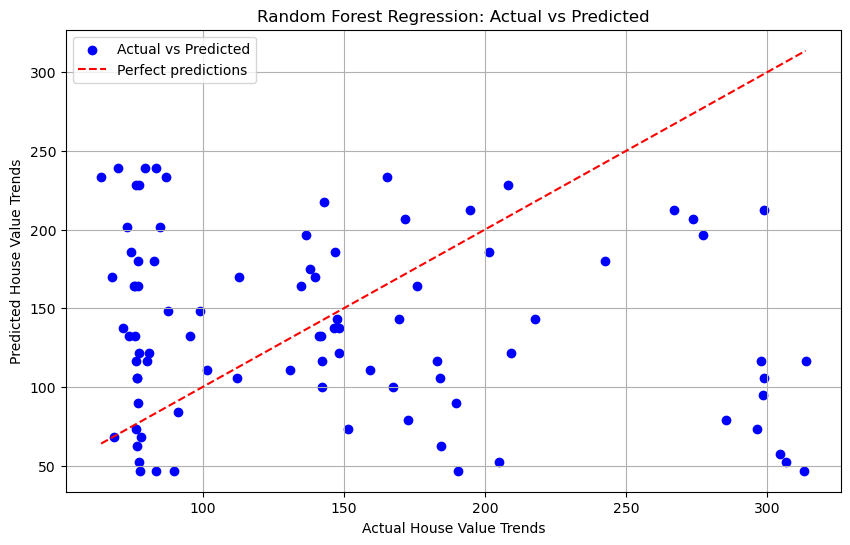

In [ ]:
import matplotlib.pyplot as plt

# Plotting the scatter plot for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_prediction, color='blue', label='Actual vs Predicted')

# Adding a line for perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect predictions')

plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual House Value Trends')
plt.ylabel('Predicted House Value Trends')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:


# Assuming X_new is a DataFrame with columns ['year', 'month', 'day']
X_new = pd.DataFrame([[2024, 1, 1]], columns=['year', 'month', 'day'])

# Making predictions using the trained Random Forest Regression model
predicted_house_value = RF.predict(X_new)

print("Predicted house value for January 1, 2024:", predicted_house_value[0])


Predicted house value for January 1, 2024: 297.1885059444444


- The output "Predicted house value for January 1, 2024: 297.18" indicates the predicted value for the house price on January 1, 2024, based on the trained Random Forest Regression model.

- When you use the model to make predictions for a specific date, such as January 1, 2024, the model takes into account the features (in this case, the year, month, and day) associated with that date and produces an estimate for the house price. In this instance, the model predicts that the house price will be approximately 297.19 on January 1, 2024.

- This prediction is based on the patterns and relationships learned by the model from the historical data during the training phase. The Random Forest Regression model considers multiple decision trees and averages their predictions to provide a more accurate and robust estimate of the target variable, which, in this case, is the house price.